In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sn
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fer2013.csv")
print(df)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
x = df.pixels.apply(lambda i : np.array(i.split(' ')).reshape(48,48,1).astype('float')) / 255


In [ ]:
x=np.stack(x)
x

array([[[[0.2745098 ],
         [0.31372549],
         [0.32156863],
         ...,
         [0.20392157],
         [0.16862745],
         [0.16078431]],

        [[0.25490196],
         [0.23921569],
         [0.22745098],
         ...,
         [0.21960784],
         [0.20392157],
         [0.17254902]],

        [[0.19607843],
         [0.16862745],
         [0.21176471],
         ...,
         [0.19215686],
         [0.21960784],
         [0.18431373]],

        ...,

        [[0.35686275],
         [0.25490196],
         [0.16470588],
         ...,
         [0.28235294],
         [0.21960784],
         [0.16862745]],

        [[0.30196078],
         [0.32156863],
         [0.30980392],
         ...,
         [0.41176471],
         [0.2745098 ],
         [0.18039216]],

        [[0.30196078],
         [0.28235294],
         [0.32941176],
         ...,
         [0.41568627],
         [0.42745098],
         [0.32156863]]],


       [[[0.59215686],
         [0.58823529],
         [0.57

In [ ]:

y = df['emotion']

y


0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.202, random_state=42)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 7)
y_test = keras.utils.to_categorical(y_test, 7)

y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
Input_shape= (48,48,1) 

model = keras.Sequential(
    [
        keras.Input(shape=Input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Flatten(),
        layers.Dense(7, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
202/202 [==============================] - 4s 15ms/step - loss: 1.7674 - accuracy: 0.2774 - val_loss: 1.6745 - val_accuracy: 0.3401
Epoch 2/20
202/202 [==============================] - 3s 14ms/step - loss: 1.5371 - accuracy: 0.4075 - val_loss: 1.4811 - val_accuracy: 0.4302
Epoch 3/20
202/202 [==============================] - 3s 13ms/step - loss: 1.3995 - accuracy: 0.4657 - val_loss: 1.3715 - val_accuracy: 0.4696
Epoch 4/20
202/202 [==============================] - 3s 13ms/step - loss: 1.3007 - accuracy: 0.5059 - val_loss: 1.3059 - val_accuracy: 0.5101
Epoch 5/20
202/202 [==============================] - 3s 13ms/step - loss: 1.2222 - accuracy: 0.5372 - val_loss: 1.2775 - val_accuracy: 0.5066
Epoch 6/20
202/202 [==============================] - 3s 13ms/step - loss: 1.1600 - accuracy: 0.5623 - val_loss: 1.2637 - val_accuracy: 0.5279
Epoch 7/20
202/202 [==============================] - 3s 13ms/step - loss: 1.1063 - accuracy: 0.5852 - val_loss: 1.2183 - val_accuracy: 0.5367

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.7536391019821167
Test accuracy: 0.5518620610237122


## Visualization


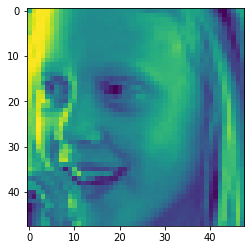

In [ ]:
plt.imshow(np.squeeze(x_test[45]))
plt.show()

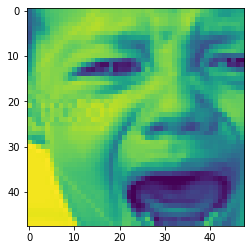

In [ ]:
plt.imshow(np.squeeze(x_test[46]))
plt.show()

In [ ]:
predict_prob = model.predict(x_test)

print(np.round(predict_prob[45],3)*255)

[  0.25500003   0.           0.25500003 221.08499      0.
   0.25500003  32.894997  ]


In [ ]:
y_pred = np.argmax(predict_prob,axis=1)

y_pred[45],y_pred[46]

(3, 2)

In [ ]:
y_actual = np.argmax(y_test,axis=1)

y_actual[45],y_actual[46]

(3, 4)

## Confusion matrix, Recall, F1

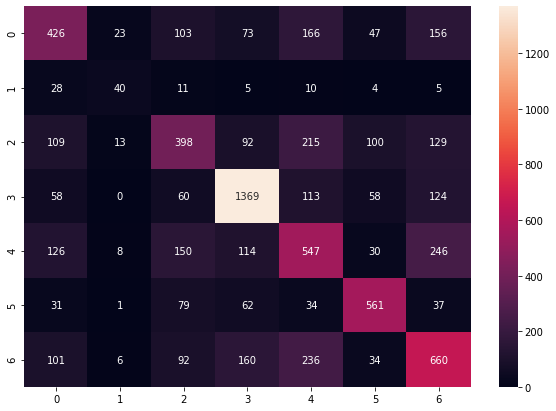

In [ ]:
array = confusion_matrix(y_actual, y_pred)

df_cm = pd.DataFrame(array, range(7), range(7))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')

plt.show()

In [ ]:
report = classification_report(y_actual,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.48      0.43      0.45       994
           1       0.44      0.39      0.41       103
           2       0.45      0.38      0.41      1056
           3       0.73      0.77      0.75      1782
           4       0.41      0.45      0.43      1221
           5       0.67      0.70      0.68       805
           6       0.49      0.51      0.50      1289

    accuracy                           0.55      7250
   macro avg       0.52      0.52      0.52      7250
weighted avg       0.55      0.55      0.55      7250

